In [385]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [386]:
df=pd.read_csv('winedataset.csv')
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [387]:
df.shape

(178, 14)

In [388]:
df.dtypes

Class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
diluted wines           float64
Proline                   int64
dtype: object

In [389]:
df.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines',
       'Proline    '],
      dtype='object')

In [390]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [391]:
df.nunique()

Class                     3
Alcohol                 126
Malic acid              133
Ash                      79
Alcalinity of ash        63
Magnesium                53
Total phenols            97
Flavanoids              132
Nonflavanoid phenols     39
Proanthocyanins         101
Color intensity         132
Hue                      78
diluted wines           122
Proline                 121
dtype: int64

In [392]:
dco=df.corr()
dco

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


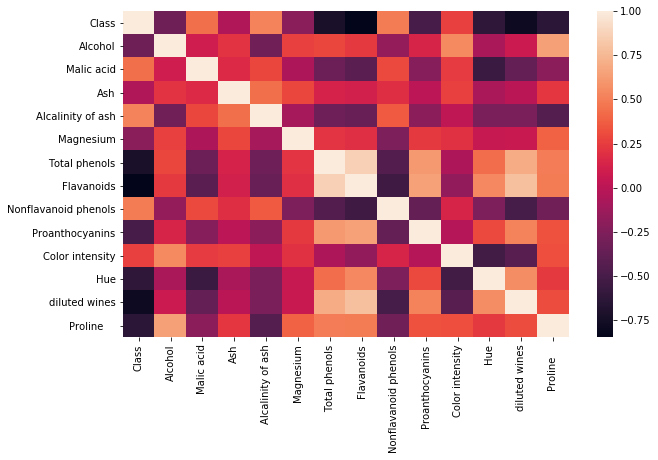

In [393]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(dco)

In [394]:
from scipy.stats import zscore

In [395]:
z_score=abs(zscore(df))
print(df.shape)
dffinal=df.loc[(z_score<3).all(axis=1)]
print(dffinal.shape)

(178, 14)
(168, 14)


In [396]:
dffinal

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [397]:
dffinal.skew()

Class                   0.117053
Alcohol                -0.028038
Malic acid              0.966253
Ash                    -0.250438
Alcalinity of ash       0.104774
Magnesium               0.566522
Total phenols           0.132108
Flavanoids             -0.077205
Nonflavanoid phenols    0.481810
Proanthocyanins         0.360217
Color intensity         0.732580
Hue                    -0.137430
diluted wines          -0.282514
Proline                 0.744773
dtype: float64

In [398]:
dfp=pd.DataFrame(dffinal)
dfp

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [399]:
for col in dfp.columns:
    if dfp.skew().loc[col]>0.55:
        dfp[col]=np.log1p(dfp[col])

In [400]:
dfp.skew()

Class                   0.117053
Alcohol                -0.028038
Malic acid              0.481235
Ash                    -0.250438
Alcalinity of ash       0.104774
Magnesium               0.260440
Total phenols           0.132108
Flavanoids             -0.077205
Nonflavanoid phenols    0.481810
Proanthocyanins         0.360217
Color intensity         0.012720
Hue                    -0.137430
diluted wines          -0.282514
Proline                 0.071873
dtype: float64

In [401]:
dfp

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,0.996949,2.43,15.6,4.852030,2.80,3.06,0.28,2.29,1.893112,1.04,3.92,6.971669
1,1,13.20,1.022451,2.14,11.2,4.615121,2.65,2.76,0.26,1.28,1.682688,1.05,3.40,6.957497
2,1,13.16,1.211941,2.67,18.6,4.624973,2.80,3.24,0.30,2.81,1.899118,1.03,3.17,7.078342
3,1,14.37,1.081805,2.50,16.8,4.736198,3.85,3.49,0.24,2.18,2.174752,0.86,3.45,7.300473
4,1,13.24,1.278152,2.87,21.0,4.779123,2.80,2.69,0.39,1.82,1.671473,1.04,2.93,6.601230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,1.894617,2.45,20.5,4.564348,1.68,0.61,0.52,1.06,2.163323,0.64,1.74,6.608001
174,3,13.40,1.591274,2.48,23.0,4.634729,1.80,0.75,0.43,1.41,2.116256,0.70,1.56,6.621406
175,3,13.27,1.663926,2.26,20.0,4.795791,1.59,0.69,0.43,1.35,2.415914,0.59,1.56,6.728629
176,3,13.17,1.278152,2.37,20.0,4.795791,1.65,0.68,0.53,1.46,2.332144,0.60,1.62,6.734592


In [402]:
y=dfp.iloc[:,0]
x=dfp.iloc[:,1:]

In [403]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 168, dtype: int64

In [404]:
x

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,14.23,0.996949,2.43,15.6,4.852030,2.80,3.06,0.28,2.29,1.893112,1.04,3.92,6.971669
1,13.20,1.022451,2.14,11.2,4.615121,2.65,2.76,0.26,1.28,1.682688,1.05,3.40,6.957497
2,13.16,1.211941,2.67,18.6,4.624973,2.80,3.24,0.30,2.81,1.899118,1.03,3.17,7.078342
3,14.37,1.081805,2.50,16.8,4.736198,3.85,3.49,0.24,2.18,2.174752,0.86,3.45,7.300473
4,13.24,1.278152,2.87,21.0,4.779123,2.80,2.69,0.39,1.82,1.671473,1.04,2.93,6.601230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,1.894617,2.45,20.5,4.564348,1.68,0.61,0.52,1.06,2.163323,0.64,1.74,6.608001
174,13.40,1.591274,2.48,23.0,4.634729,1.80,0.75,0.43,1.41,2.116256,0.70,1.56,6.621406
175,13.27,1.663926,2.26,20.0,4.795791,1.59,0.69,0.43,1.35,2.415914,0.59,1.56,6.728629
176,13.17,1.278152,2.37,20.0,4.795791,1.65,0.68,0.53,1.46,2.332144,0.60,1.62,6.734592


In [405]:
from sklearn.preprocessing import StandardScaler

In [406]:
scale=StandardScaler()

In [407]:
x=scale.fit_transform(x)

In [408]:
x

array([[ 1.51353876, -0.52878514,  0.25063712, ...,  0.40376609,
         1.8574532 ,  1.0383251 ],
       [ 0.21092886, -0.44528371, -0.94535119, ...,  0.44924866,
         1.12760518,  1.00436113],
       [ 0.16034207,  0.17515818,  1.24042055, ...,  0.35828352,
         0.80478778,  1.29398645],
       ...,
       [ 0.29945574,  1.65508026, -0.45045947, ..., -1.64294949,
        -1.454934  ,  0.45583517],
       [ 0.17298876,  0.39195173,  0.00319127, ..., -1.59746692,
        -1.37072076,  0.4701267 ],
       [ 1.38707178,  1.54151032,  1.52910738, ..., -1.55198436,
        -1.39879184, -0.50022034]])

In [409]:
xd=pd.DataFrame(x)
xd

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.513539,-0.528785,0.250637,-1.209653,2.082904,0.840250,1.068668,-0.669081,1.395565,0.406648,0.403766,1.857453,1.038325
1,0.210929,-0.445284,-0.945351,-2.624711,0.160872,0.600640,0.763248,-0.830933,-0.517348,-0.173889,0.449249,1.127605,1.004361
2,0.160342,0.175158,1.240421,-0.244840,0.240803,0.840250,1.251920,-0.507230,2.380432,0.423218,0.358284,0.804788,1.293986
3,1.690593,-0.250942,0.539324,-0.823728,1.143169,2.517517,1.506437,-0.992784,1.187228,1.183662,-0.414920,1.197783,1.826365
4,0.261516,0.391952,2.065240,0.527010,1.491416,0.840250,0.691983,0.221100,0.505398,-0.204830,0.403766,0.467935,0.150501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.855910,2.410424,0.333119,0.366208,-0.251040,-0.948835,-1.425598,1.273133,-0.934022,1.152131,-1.415537,-1.202294,0.166728
164,0.463863,1.417197,0.456842,1.170218,0.319954,-0.757147,-1.283068,0.544803,-0.271131,1.022277,-1.142641,-1.454934,0.198856
165,0.299456,1.655080,-0.450459,0.205406,1.626635,-1.092601,-1.344152,0.544803,-0.384770,1.849003,-1.642949,-1.454934,0.455835
166,0.172989,0.391952,0.003191,0.205406,1.626635,-0.996757,-1.354333,1.354059,-0.176433,1.617890,-1.597467,-1.370721,0.470127


In [410]:
xd.skew()

0    -0.028038
1     0.481235
2    -0.250438
3     0.104774
4     0.260440
5     0.132108
6    -0.077205
7     0.481810
8     0.360217
9     0.012720
10   -0.137430
11   -0.282514
12    0.071873
dtype: float64

In [411]:
xd

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.513539,-0.528785,0.250637,-1.209653,2.082904,0.840250,1.068668,-0.669081,1.395565,0.406648,0.403766,1.857453,1.038325
1,0.210929,-0.445284,-0.945351,-2.624711,0.160872,0.600640,0.763248,-0.830933,-0.517348,-0.173889,0.449249,1.127605,1.004361
2,0.160342,0.175158,1.240421,-0.244840,0.240803,0.840250,1.251920,-0.507230,2.380432,0.423218,0.358284,0.804788,1.293986
3,1.690593,-0.250942,0.539324,-0.823728,1.143169,2.517517,1.506437,-0.992784,1.187228,1.183662,-0.414920,1.197783,1.826365
4,0.261516,0.391952,2.065240,0.527010,1.491416,0.840250,0.691983,0.221100,0.505398,-0.204830,0.403766,0.467935,0.150501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.855910,2.410424,0.333119,0.366208,-0.251040,-0.948835,-1.425598,1.273133,-0.934022,1.152131,-1.415537,-1.202294,0.166728
164,0.463863,1.417197,0.456842,1.170218,0.319954,-0.757147,-1.283068,0.544803,-0.271131,1.022277,-1.142641,-1.454934,0.198856
165,0.299456,1.655080,-0.450459,0.205406,1.626635,-1.092601,-1.344152,0.544803,-0.384770,1.849003,-1.642949,-1.454934,0.455835
166,0.172989,0.391952,0.003191,0.205406,1.626635,-0.996757,-1.354333,1.354059,-0.176433,1.617890,-1.597467,-1.370721,0.470127


In [412]:
xtrain,xtest,ytrain,ytest=train_test_split(xd,y,test_size=.22,random_state=45)

In [413]:
model=[LogisticRegression(),SVC(),DecisionTreeClassifier()]

In [414]:
for m in model:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    predm=m.predict(xtest)
    print('accuracy score of ',m,'is',accuracy_score(ytest,predm))
    print(confusion_matrix(ytest,predm))
    print(classification_report(ytest,predm))
    print('\n')

accuracy score of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is 0.972972972972973
[[11  0  0]
 [ 0  9  1]
 [ 0  0 16]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      0.90      0.95        10
           3       0.94      1.00      0.97        16

    accuracy                           0.97        37
   macro avg       0.98      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37



accuracy score of  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_sta

In [416]:
from sklearn.model_selection import cross_val_score

In [417]:
lr=LogisticRegression()
lrscores=cross_val_score(lr,x,y,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[0.97058824 0.97058824 1.         1.         1.        ]
0.9882352941176471 0.014408763192842226


In [418]:
svc=SVC(probability=True)
svcscores=cross_val_score(svc,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[1.         0.97058824 1.         1.         1.        ]
0.9941176470588236 0.011764705882352944


In [419]:
dtc=DecisionTreeClassifier()
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.79411765 0.85294118 0.88235294 0.96969697 0.90909091]
0.8816399286987522 0.05829558361241146


In [420]:
svc.fit(xtrain,ytrain)
predsvc=svc.predict(xtest)
y_pred_prob=svc.predict_proba(xtest)[:,1]
print(y_pred_prob)

[0.16694605 0.0077962  0.96773073 0.20060768 0.03771795 0.0310163
 0.00916162 0.05762783 0.99019475 0.00774957 0.0214926  0.13236189
 0.00371992 0.97996058 0.0769994  0.02914253 0.00902068 0.0074554
 0.00306673 0.0439763  0.81909636 0.98596021 0.03510634 0.04492393
 0.1109     0.01926914 0.99327632 0.90876611 0.87560059 0.0412395
 0.01665748 0.01450529 0.11228243 0.98121318 0.03178854 0.01922418
 0.9931515 ]


In [421]:
from sklearn.externals import joblib
joblib.dump(svc,'svcfile.obj')
svc_from_joblib=joblib.load('svcfile.obj')
svc_from_joblib.predict(xtest)

array([3, 1, 2, 3, 1, 1, 1, 3, 2, 3, 3, 3, 1, 2, 3, 3, 3, 3, 1, 3, 2, 2,
       3, 1, 1, 3, 2, 2, 2, 3, 1, 1, 1, 2, 3, 3, 2], dtype=int64)